In [28]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from __future__ import division
import datetime, nltk, warnings


#from __future__ import division
from plotly.offline import init_notebook_mode,iplot

from scipy.sparse import csr_matrix, lil_matrix
from scipy import spatial
from scipy import stats


In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [85]:
#import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objects as go
#initiate visualization library for jupyter notebook 


In [31]:
import csv
import nltk

In [32]:
import os
import pandas as pd
cs_data = pd.read_csv(r"C:\Users\nishtha\Documents\Data.csv",encoding= 'unicode_escape')




In [33]:
#we will be using only UK data
#cs_uk = cs_data.query("Country=='United Kingdom'").reset_index(drop=True)
#cs_uk
cs_data



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [34]:
cs_data['InvoiceDate'] = pd.to_datetime(cs_data['InvoiceDate'])
cs_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [35]:
cs_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [36]:
cs_data['InvoiceDate'].describe()

count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [37]:
cs_data.drop_duplicates(subset = ['InvoiceNo', 'StockCode'], inplace = True, keep = 'first')
#cs_data.to_csv('LARGE_CSV_FILE_PROCESSED.csv', index = False)


In [38]:
new_data = pd.read_csv(r"C:\Users\nishtha\Documents\Sound recordings\LARGE_CSV_FILE_PROCESSED.csv",encoding= 'unicode_escape')


#C:\Users\nishtha\Documents\Sound recordings\LARGE_CSV_FILE_PROCESSED['InvoiceDate'].describe()

In [39]:
new_data['InvoiceDate'].describe()

count                  531225
unique                  23260
top       2011-10-31 14:41:00
freq                     1110
Name: InvoiceDate, dtype: object

In [40]:
tab_info=pd.DataFrame(cs_data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(cs_data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(cs_data.isnull().sum()/cs_data.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)
#__________________
# show first lines
display(cs_data[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,1454,0,0,0,134544,0
null values (%),0,0,0.273707,0,0,0,25.3271,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [41]:
cs_data.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', cs_data.shape)
#____________________________________________________________
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(cs_data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(cs_data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(cs_data.isnull().sum()/cs_data.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

Dataframe dimensions: (396681, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0


In [42]:
print('Entrées dupliquées: {}'.format(cs_data.duplicated().sum()))
cs_data.drop_duplicates(inplace = True)


Entrées dupliquées: 0


In [43]:
temp = cs_data[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Nb. dataframe: {}'.format(len(countries)))

Nb. dataframe: 37


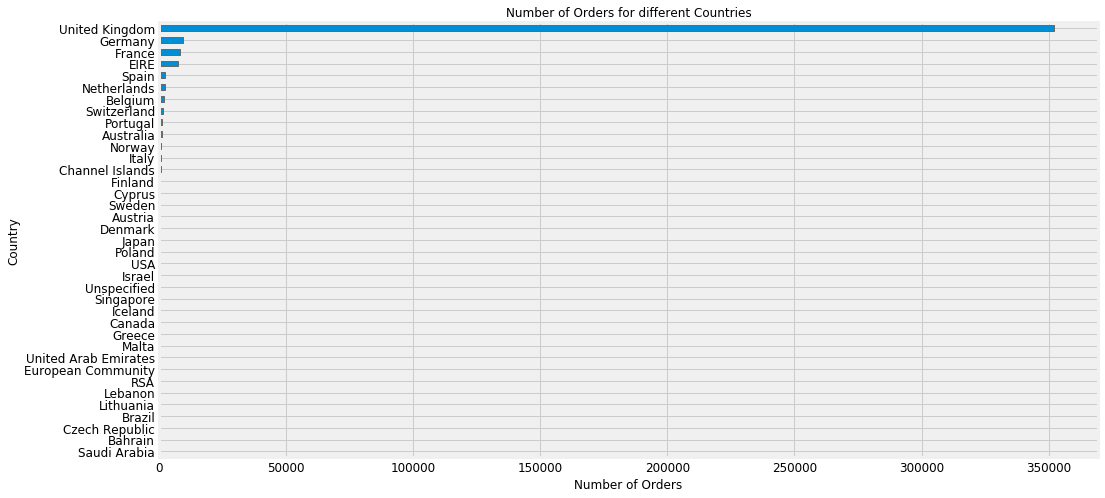

In [18]:
group_country_orders = cs_data.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']
color = sns.color_palette()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [44]:
#get visualization for UK
cs_uk = new_data.query("Country=='United Kingdom'").reset_index(drop=True)


In [45]:
pd.DataFrame([{'products': len(cs_uk['StockCode'].value_counts()),    
               'transactions': len(cs_uk['InvoiceNo'].value_counts()),
               'customers': len(cs_uk['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])


,products,transactions,customers
quantity,4065,23494,3950


In [46]:
temp = cs_uk.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12747.0,537215,7
3,12747.0,538537,8
4,12747.0,541677,5
5,12747.0,545321,12
6,12747.0,551992,9
7,12747.0,554549,14
8,12747.0,558265,8
9,12747.0,563949,7


In [47]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(nb_products_per_basket[:5])
#______________________________________________________________________________________________
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12747.0,537215,7,0
3,12747.0,538537,8,0
4,12747.0,541677,5,0


Number of orders canceled: 3208/19857 (16.16%) 


In [48]:
display(cs_uk.sort_values('CustomerID')[:5])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
56504,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
56499,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
96094,545321,21745,GAOLERS KEYS DECORATIVE GARDEN,4,2011-03-01 14:53:00,3.75,12747.0,United Kingdom
336384,569397,21136,PAINTED METAL PEARS ASSORTED,16,2011-10-04 08:26:00,1.69,12747.0,United Kingdom
478400,581163,82482,WOODEN PICTURE FRAME WHITE FINISH,12,2011-12-07 14:34:00,2.95,12747.0,United Kingdom


In [49]:
df_check = cs_uk[cs_uk['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if cs_uk[(cs_uk['CustomerID'] == col[0]) & (cs_uk['Quantity'] == -col[1]) 
                & (cs_uk['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 120, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [50]:
df_check = cs_uk[(cs_uk['Quantity'] < 0) & (cs_uk['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if cs_uk[(cs_uk['CustomerID'] == col[0]) & (cs_uk['Quantity'] == -col[1]) 
                & (cs_uk['Description'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break


133 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 133, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [51]:
df_cleaned = cs_uk.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  cs_uk.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = cs_uk[(cs_uk['CustomerID'] == col['CustomerID']) &
                         (cs_uk['StockCode']  == col['StockCode']) & 
                         (cs_uk['InvoiceDate'] < col['InvoiceDate']) & 
                         (cs_uk['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break    

In [52]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))


entry_to_remove: 6232
doubtfull_entry: 2718


In [53]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]


nb of entries to delete: 42


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
43212,C540360,84985A,SET OF 72 GREEN PAPER DOILIES,-5,2011-01-06 15:35:00,1.45,18041.0,United Kingdom,0
70536,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358.0,United Kingdom,0
105005,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422.0,United Kingdom,0
178752,C553904,22897,OVEN MITT APPLES DESIGN,-11,2011-05-19 18:10:00,1.45,13081.0,United Kingdom,0
192988,C555529,22698,PINK REGENCY TEACUP AND SAUCER,-24,2011-06-05 11:45:00,2.95,16923.0,United Kingdom,0


In [54]:
print(df_cleaned.shape)

df_cleaned = df_cleaned[ np.abs((df_cleaned['UnitPrice']-df_cleaned['UnitPrice'].mean())/df_cleaned['UnitPrice'].std()) <= 3]
df_cleaned = df_cleaned[ np.abs((df_cleaned['Quantity']-df_cleaned['Quantity'].mean())/df_cleaned['Quantity'].std()) <= 3]

df_cleaned = df_cleaned[df_cleaned["UnitPrice"] >= 0 ]
df_cleaned = df_cleaned[df_cleaned["InvoiceNo"].astype(str).str[0] != "C"]
df_cleaned = df_cleaned[df_cleaned["InvoiceNo"].astype(str).str[0] != "A"]
df_cleaned = df_cleaned[df_cleaned["Quantity"] > 0 ]

print(df_cleaned.shape)

(476057, 9)
(474958, 9)


In [57]:
df_cleaned['Revenue'] = df_cleaned['Quantity']*df_cleaned['UnitPrice']
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])



In [58]:
df_cleaned['Year'] = df_cleaned["InvoiceDate"].map(lambda x: x.year)
df_cleaned['Month'] = df_cleaned["InvoiceDate"].map(lambda x: x.month)

df_cleaned['Minute'] = df_cleaned["InvoiceDate"].map(lambda x: x.minute)
df_cleaned['Week'] = df_cleaned["InvoiceDate"].map(lambda x: x.week)
df_cleaned['Day'] = df_cleaned["InvoiceDate"].map(lambda x: x.day)
df_cleaned['Hour'] = df_cleaned["InvoiceDate"].map(lambda x: x.hour)


In [59]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,Revenue,Year,Month,Minute,Week,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,2010,12,26,48,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010,12,26,48,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,2010,12,26,48,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010,12,26,48,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010,12,26,48,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485002,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,0,23.40,2011,12,31,49,9,12
485003,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,0,23.60,2011,12,49,49,9,12
485004,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,0,30.00,2011,12,49,49,9,12
485005,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,0,214.80,2011,12,49,49,9,12


In [87]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344031 entries, 0 to 344030
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceNo             344031 non-null  object        
 1   StockCode             344031 non-null  object        
 2   Description           344031 non-null  object        
 3   Quantity              344031 non-null  int64         
 4   InvoiceDate           344031 non-null  datetime64[ns]
 5   UnitPrice             344031 non-null  float64       
 6   CustomerID            344031 non-null  float64       
 7   Country               344031 non-null  object        
 8   QuantityCanceled      344031 non-null  int64         
 9   Revenue               344031 non-null  float64       
 10  Year                  344031 non-null  int64         
 11  Month                 344031 non-null  int64         
 12  Minute                344031 non-null  int64         
 13 

In [88]:
df_cleaned.describe()

,Quantity,UnitPrice,CustomerID,QuantityCanceled,Revenue,Year,Month,Minute,Week,Day,Hour,MinPurchaseYearMonth,InvoiceYearMonth
count,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000,344031.000000
mean,10.864544,2.854441,15544.577573,0.168363,19.128020,2010.932936,7.622938,30.283847,31.006174,15.032026,12.798422,201065.557688,201100.916566
std,24.124634,3.408911,1594.009546,4.162505,52.420053,0.250133,3.415188,17.064152,14.751627,8.682702,2.249111,45.832971,24.054491
min,1.000000,0.000000,12747.000000,0.000000,0.000000,2010.000000,1.000000,0.000000,1.000000,1.000000,6.000000,201012.000000,201012.000000
25%,2.000000,1.250000,14189.000000,0.000000,4.200000,2011.000000,5.000000,16.000000,19.000000,7.000000,11.000000,201012.000000,201104.000000
50%,5.000000,1.950000,15513.000000,0.000000,10.500000,2011.000000,8.000000,31.000000,35.000000,15.000000,13.000000,201101.000000,201107.000000
75%,12.000000,3.750000,16931.000000,0.000000,17.850000,2011.000000,11.000000,45.000000,44.000000,22.000000,14.000000,201104.000000,201110.000000
max,504.000000,125.000000,18287.000000,500.000000,3285.000000,2011.000000,12.000000,59.000000,51.000000,31.000000,20.000000,201112.000000,201112.000000


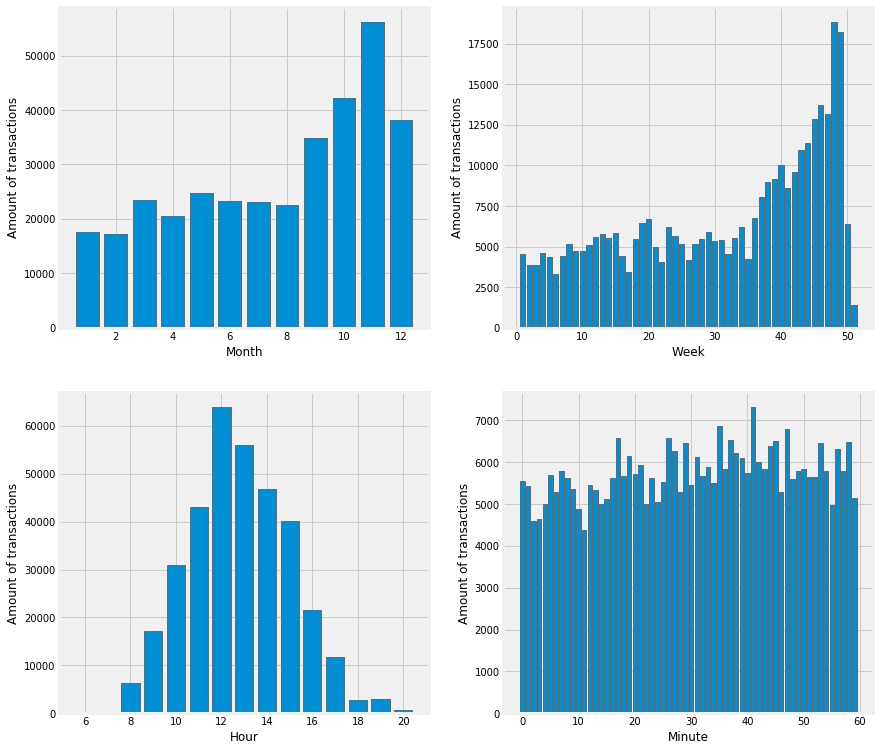

In [89]:



grps = np.array([['Month', 'Week'], ['Hour', 'Minute']])

fig, ax = plt.subplots(grps.shape[0],grps.shape[1], figsize=(13, 13))

for i in range(0, grps.shape[0]):
    for j in range(0, grps.shape[1]):
        grp_data = df_cleaned[[grps[i,j], 'InvoiceNo']].groupby([grps[i,j]]).count()
        ax[i,j].bar(x=grp_data.index, height='InvoiceNo', data=grp_data)
        ax[i,j].set_ylabel('Amount of transactions')
        ax[i,j].set_xlabel(grps[i,j])
        
plt.show()


<Figure size 432x288 with 0 Axes>

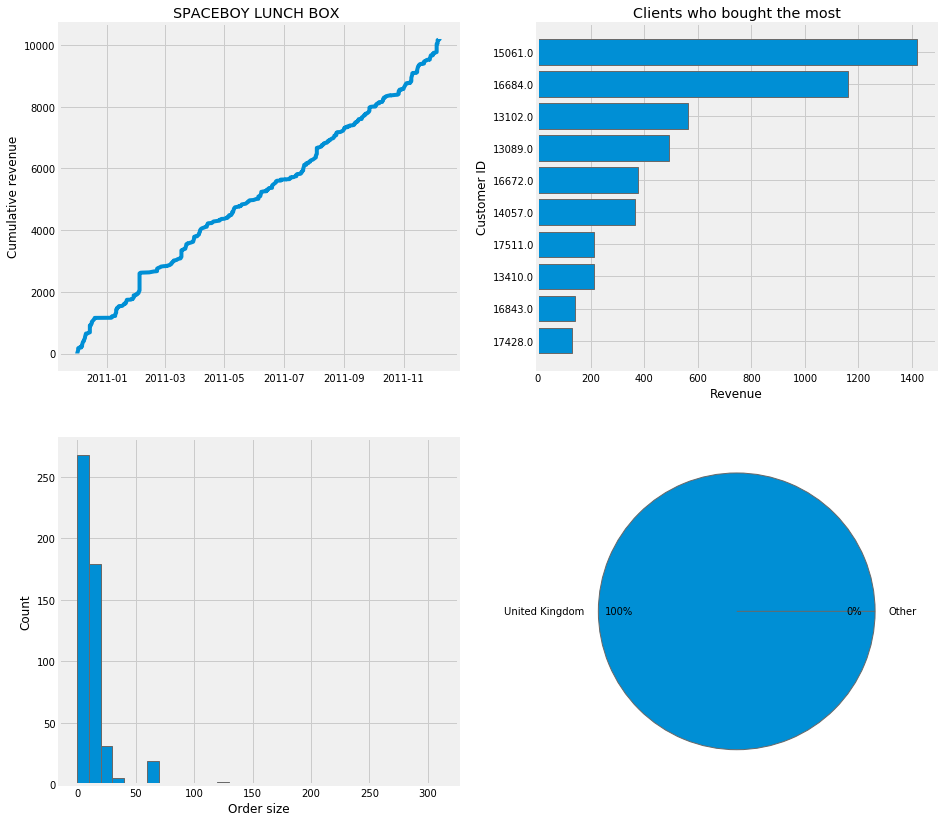

In [90]:
def top_stock(stockcode, top_n):
    """ Plot cumulative sales in pound sterling, 
    clients who bought the most, distribution of order size
    and pie chart with country % of buyers.    
    Parameters:
    stockcode: string with stock id
    top_n: how many bars etc to plot"""

    stock = df_cleaned[df_cleaned['StockCode'] == stockcode].sort_values(['InvoiceDate'])
    stock['ValueCum'] = stock['Revenue'].cumsum()

    top_buyers = stock[['Revenue', 'CustomerID']].groupby(['CustomerID']).sum().sort_values(by='Revenue', ascending=False).reset_index()
    top_buyers = top_buyers[0:top_n]

    ctry = stock[['Country', 'Revenue']].groupby(['Country']).sum().sort_values(by='Revenue', ascending=False)
    ctry = ((ctry/ctry.sum())*100).round(2)
    ctry = ctry[0:int(top_n/2)]
    ctry = ctry.append(pd.DataFrame(data=[100-ctry.sum()], columns=['Revenue'], index=['Other'] ))

    plt.clf()

    fig, ax = plt.subplots(grps.shape[0],grps.shape[1], figsize=(14, 14))
    
    ax[0,0].plot(stock['InvoiceDate'].dt.date, stock['ValueCum'])
    ax[0,0].set_ylabel('Cumulative revenue')        
    ax[0,0].set_title(stock['Description'].iloc[0])    

    ax[0,1].invert_yaxis()
    ax[0,1].barh(y=top_buyers.index, width='Revenue', data=top_buyers)
    ax[0,1].set_yticks(range(0,top_n))
    ax[0,1].set_yticklabels(top_buyers['CustomerID'].tolist())
    ax[0,1].set_ylabel('Customer ID')        
    ax[0,1].set_xlabel('Revenue')      
    ax[0,1].set_title("Clients who bought the most")        

    ax[1,0].hist(stock['Quantity'], bins=range(0,stock['Quantity'].max(), top_n) )
    ax[1,0].set_ylabel('Count')        
    ax[1,0].set_xlabel('Order size')     

    ax[1,1].pie(ctry['Revenue'], labels=ctry.index,  autopct='%1.0f%%', pctdistance=0.85)

    plt.show()
    
top_stock(stockcode="22629", top_n = 10)    


In [91]:
customer_by_month1 = df_cleaned.groupby('CustomerID')['InvoiceDate'].min().reset_index()
customer_by_month1['days'] = pd.TimedeltaIndex(customer_by_month1.InvoiceDate.dt.day,unit="D")
customer_by_month1['Month'] = customer_by_month1.InvoiceDate- customer_by_month1.days+pd.DateOffset(days=1)
customer_by_month1['Quarter_acquisition'] = customer_by_month1['Month'].dt.quarter.apply(lambda x:'Q'+str(x))
customer_by_month1['Year_acquisition'] = customer_by_month1['Month'].dt.year
customer_by_month = df_cleaned.groupby(by = customer_by_month1.Month)['CustomerID'].size().reset_index()
customer_by_month.sort_values(by ='Month',ascending=True,inplace=True)
customer_by_month['cum_customer'] = np.cumsum(customer_by_month.CustomerID)
customer_by_month['Month_1'] = customer_by_month['Month'].dt.strftime('%b-%y')

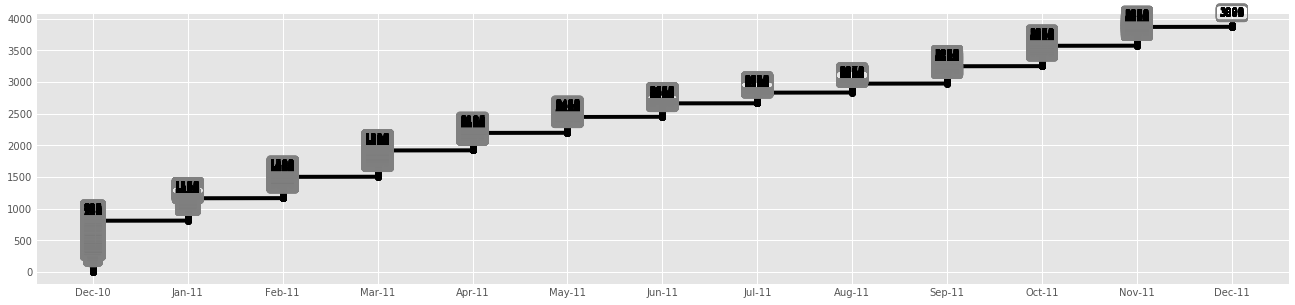

In [92]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.plot(customer_by_month.Month_1,customer_by_month.cum_customer,'bo-',color='black')

# zip joins x and y coordinates in pairs
for d,c in zip(customer_by_month['Month_1'],customer_by_month['cum_customer']):

    label = "{:.0f}".format(c)

    plt.annotate(label, 
                 (d,c), 
                 textcoords="offset points"
                 , bbox=dict(boxstyle="round", fc="none", ec="gray")
                 #,arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=10,rad=90")
                 ,xytext=(0,10),
                 ha='center') 
plt.show()

del customer_by_month


In [93]:
#create a dataframe contaning CustomerID and first purchase date
tx_min_purchase = df_cleaned.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)



In [94]:
#merge first purchase date column to our main dataframe (tx_uk)
df_cleaned = pd.merge(df_cleaned, tx_min_purchase, on='CustomerID')

df_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,Revenue,...,Minute,Week,Day,Hour,MinPurchaseDate_x,MinPurchaseYearMonth_x,UserType,InvoiceYearMonth,MinPurchaseDate_y,MinPurchaseYearMonth_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,...,26,48,1,8,2010-12-01 08:26:00,201012,New,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,...,26,48,1,8,2010-12-01 08:26:00,201012,New,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,...,26,48,1,8,2010-12-01 08:26:00,201012,New,201012,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,...,26,48,1,8,2010-12-01 08:26:00,201012,New,201012,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,...,26,48,1,8,2010-12-01 08:26:00,201012,New,201012,2010-12-01 08:26:00,201012


In [96]:
#how much money have they spent
total_spend = df_cleaned.groupby(by='CustomerID', as_index=False)['Revenue'].sum()
total_spend.columns = ['CustomerID', 'total_spent']
total_spend.describe()


,CustomerID,total_spent
count,3904.000000,3904.000000
mean,15562.041240,1685.612662
std,1575.570291,5883.656225
min,12747.000000,2.900000
25%,14208.750000,289.982500
50%,15568.500000,632.170000
75%,16914.250000,1543.815000
max,18287.000000,238169.000000


In [97]:
#how many items they bought
total_items = cs_uk.groupby(by='CustomerID', as_index=False)['Quantity'].sum()
total_items.columns = ['CustomerID', 'NumberItems']
total_items.describe()


,CustomerID,NumberItems
count,3950.000000,3950.000000
mean,15562.029367,1005.928608
std,1576.848325,3194.294208
min,12346.000000,-303.000000
25%,14208.250000,145.000000
50%,15571.500000,347.500000
75%,16913.750000,916.500000
max,18287.000000,69013.000000


In [98]:
tx_user = pd.DataFrame(df_cleaned['CustomerID'].unique())
tx_user.columns = ['CustomerID']


In [99]:
#get the max purchase date for each customer and create a dataframe with it
Max_purchase= df_cleaned.groupby('CustomerID').InvoiceDate.max().reset_index()
Max_purchase.columns = ['CustomerID','MaxPurchaseDate']


In [100]:
Max_purchase['Recency'] = (Max_purchase['MaxPurchaseDate'].max() - Max_purchase['MaxPurchaseDate']).dt.days


In [101]:
#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, Max_purchase[['CustomerID','Recency']], on='CustomerID')

tx_user.head()


,CustomerID,Recency
0,17850.0,371
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25


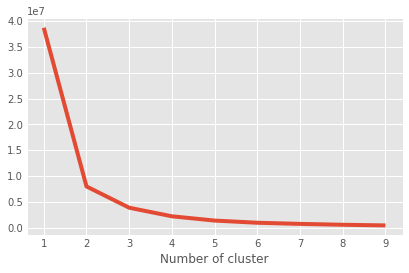

In [102]:
from sklearn.cluster import KMeans

sse={}
Recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Recency)
    Recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [103]:
#get order counts for each user and create a dataframe with it
frequency = df_cleaned.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, frequency, on='CustomerID')

In [104]:
#calculate revenue for each customer

tx_revenue = df_cleaned.groupby('CustomerID').Revenue.sum().reset_index()

#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

In [111]:
tx_user

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore
0,17850.0,371,297,5391.21,0,1,0,1
1,15808.0,305,191,3619.22,0,1,0,1
2,14688.0,7,321,5572.45,3,1,0,4
3,13448.0,16,190,3478.19,3,1,0,4
4,17920.0,3,630,3971.38,3,1,0,4
...,...,...,...,...,...,...,...,...
3899,14769.0,2,1039,10204.13,3,2,1,6
3900,17811.0,3,799,7644.93,3,2,1,6
3901,14056.0,0,1066,8043.75,3,2,1,6
3902,12748.0,0,4282,31083.14,3,3,1,7


In [105]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [106]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)


In [107]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3450.0,47.754493,42.616093,1.0,15.0,33.0,70.0,180.0
1,429.0,314.188811,127.762884,182.0,214.0,272.0,380.0,756.0
2,22.0,1257.454545,491.037650,799.0,936.0,1081.0,1408.0,2660.0
3,3.0,5609.000000,1664.787374,4282.0,4675.0,5068.0,6272.5,7477.0


In [108]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3791.0,1098.668795,1287.200785,2.90,283.59,606.91,1406.185,7431.49
1,99.0,13883.937475,7127.678326,7561.68,8892.75,10739.91,16285.385,36536.09
2,13.0,61761.509231,20358.030437,39534.92,51149.30,54534.14,61976.840,116567.51
3,1.0,238169.000000,NaN,238169.00,238169.00,238169.00,238169.000,238169.00


In [109]:
tx_user

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster
0,17850.0,371,297,5391.21,0,1,0
1,15808.0,305,191,3619.22,0,1,0
2,14688.0,7,321,5572.45,3,1,0
3,13448.0,16,190,3478.19,3,1,0
4,17920.0,3,630,3971.38,3,1,0
...,...,...,...,...,...,...,...
3899,14769.0,2,1039,10204.13,3,2,1
3900,17811.0,3,799,7644.93,3,2,1
3901,14056.0,0,1066,8043.75,3,2,1
3902,12748.0,0,4282,31083.14,3,3,1


In [110]:
#calculate overall score and use mean() to see details
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,306.811364,21.945455,336.931409
1,191.060284,31.606383,536.255640
2,80.198514,44.835456,857.561625
3,21.342970,68.006570,1195.819922
4,13.605797,291.594203,4220.600783
5,7.647059,479.352941,13397.593088
6,6.333333,906.466667,34110.159333
7,1.833333,1911.666667,88421.938333
8,2.000000,6272.500000,46372.620000


In [113]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [114]:
tx_user

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,Segment
0,17850.0,371,297,5391.21,0,1,0,1,Low-Value
1,15808.0,305,191,3619.22,0,1,0,1,Low-Value
2,14688.0,7,321,5572.45,3,1,0,4,Mid-Value
3,13448.0,16,190,3478.19,3,1,0,4,Mid-Value
4,17920.0,3,630,3971.38,3,1,0,4,Mid-Value
...,...,...,...,...,...,...,...,...,...
3899,14769.0,2,1039,10204.13,3,2,1,6,High-Value
3900,17811.0,3,799,7644.93,3,2,1,6,High-Value
3901,14056.0,0,1066,8043.75,3,2,1,6,High-Value
3902,12748.0,0,4282,31083.14,3,3,1,7,High-Value
